In [1]:
import bull

EGGS = bull.MONTHLY_RETURN(SYMBOLS=["HSY","LLY","TSLA","DAL","BTC-USD"] , FROM="2018-5-31" , TO="2023-5-1")
EGGS.head()

/usr/local/lib/python3.10/dist-packages/yfinance/base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()
[*********************100%%**********************]  5 of 5 completed


Ticker,BTC-USD,DAL,HSY,LLY,TSLA
Date,,,,,
2018-06-30,-0.145469,-0.083441,0.033541,0.003410,0.204474
2018-07-31,0.214934,0.105996,0.055341,0.157975,-0.130660
2018-08-31,-0.095478,0.074605,0.030950,0.075133,0.011807
2018-09-30,-0.058546,-0.011115,0.014724,0.015712,-0.122290
2018-10-31,-0.046479,-0.053605,0.050490,0.010531,0.274011


In [ ]:
!pip install Riskfolio-Lib
import riskfolio as rf

In [5]:
OBJECT = rf.Portfolio(returns=EGGS)
OBJECT.assets_stats()
WEIGHTS = OBJECT.efficient_frontier(points=100 )
round(WEIGHTS, 4 )

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
BTC-USD,0.0000,0.0104,0.0198,0.0272,0.0334,0.0391,0.0445,0.0495,0.0542,0.0587,...,0.1241,0.109,0.0943,0.0799,0.0659,0.0522,0.0388,0.0256,0.0127,0.0
DAL,0.0399,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
HSY,0.7147,0.6461,0.5931,0.5520,0.5164,0.4844,0.4548,0.4269,0.4003,0.3747,...,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
LLY,0.2379,0.2931,0.3200,0.3409,0.3591,0.3753,0.3903,0.4044,0.4180,0.4310,...,0.0000,0.000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
TSLA,0.0075,0.0504,0.0670,0.0799,0.0911,0.1011,0.1104,0.1192,0.1275,0.1356,...,0.8759,0.891,0.9057,0.9201,0.9341,0.9478,0.9612,0.9744,0.9873,1.0


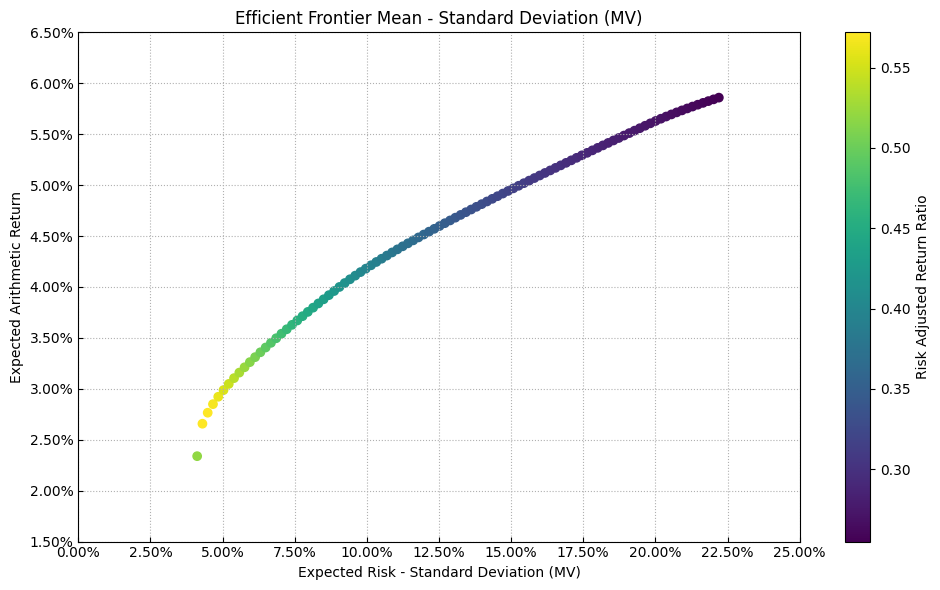

In [4]:
OBJECT = rf.Portfolio(returns=EGGS)
OBJECT.assets_stats()
WEIGHTS = OBJECT.efficient_frontier(points=100 )
round(WEIGHTS, 4 )

PLOT = rf.plot_frontier(w_frontier=WEIGHTS,
                 mu=OBJECT.mu, cov=OBJECT.cov,
                 returns=EGGS, rf=.002, t_factor=1)

# rf = risk free ratefactor
# t_factor = time factor [1: don't aggregate mthly ret, 12: agg mthly ret to annual]
# Sharpe ration = (expected return - risk-free return)/standard deviation of returns

there are 5 different assets, can make as many porfolios as desired. Efficient frontier makes the top most border greatest expected return at each SD. SD = volatility. Line color coded on Sharpe Ratio. (risk adjusted return rate)

In [10]:
# saving data in a data frame (assets weights, SD or ret, exp mthly ret
# T transpose colums and rows
# collection = each data series matplotlib can use line too
round(WEIGHTS.T, 4)

ALL = WEIGHTS.T
XY = PLOT.collections[0].get_offsets() # first element is 0, get_offsets x & y values extract
ALL [["STD. DEV", "EXP. MNTHLY RET."]]=XY
round(ALL, 4)

,BTC-USD,DAL,HSY,LLY,TSLA,STD. DEV,EXP. MNTHLY RET.
0,0.0000,0.0399,0.7147,0.2379,0.0075,0.0412,0.0234
1,0.0104,0.0000,0.6461,0.2931,0.0504,0.0430,0.0266
2,0.0198,0.0000,0.5931,0.3200,0.0670,0.0448,0.0277
3,0.0272,0.0000,0.5520,0.3409,0.0799,0.0467,0.0285
4,0.0334,0.0000,0.5164,0.3591,0.0911,0.0485,0.0292
...,...,...,...,...,...,...,...
95,0.0522,0.0000,0.0000,0.0000,0.9478,0.2147,0.0579
96,0.0388,0.0000,0.0000,0.0000,0.9612,0.2165,0.0581
97,0.0256,0.0000,0.0000,0.0000,0.9744,0.2183,0.0582
98,0.0127,0.0000,0.0000,0.0000,0.9873,0.2202,0.0584


Interactive plot point color based on Sharpe ratio. Calculate in column ALL.

In [14]:
ALL["SHARPE RATIO"] = (ALL["EXP. MNTHLY RET."] - .002) / ALL["STD. DEV"]



,BTC-USD,DAL,HSY,LLY,TSLA,STD. DEV,EXP. MNTHLY RET.,SHARPE RATIO
0,0.0000,0.0399,0.7147,0.2379,0.0075,0.0412,0.0234,0.5192
1,0.0104,0.0000,0.6461,0.2931,0.0504,0.0430,0.0266,0.5712
2,0.0198,0.0000,0.5931,0.3200,0.0670,0.0448,0.0277,0.5720
3,0.0272,0.0000,0.5520,0.3409,0.0799,0.0467,0.0285,0.5676
4,0.0334,0.0000,0.5164,0.3591,0.0911,0.0485,0.0292,0.5612
...,...,...,...,...,...,...,...,...
95,0.0522,0.0000,0.0000,0.0000,0.9478,0.2147,0.0579,0.2604
96,0.0388,0.0000,0.0000,0.0000,0.9612,0.2165,0.0581,0.2590
97,0.0256,0.0000,0.0000,0.0000,0.9744,0.2183,0.0582,0.2576
98,0.0127,0.0000,0.0000,0.0000,0.9873,0.2202,0.0584,0.2563


In [17]:
ALL["SHARPE RATIO"] = round(ALL["SHARPE RATIO"],4)
ALL

,BTC-USD,DAL,HSY,LLY,TSLA,STD. DEV,EXP. MNTHLY RET.,SHARPE RATIO
0,8.340942e-11,3.988520e-02,7.147049e-01,2.378686e-01,0.007541,0.041195,0.023387,0.5192
1,1.040680e-02,2.625165e-09,6.460886e-01,2.931327e-01,0.050372,0.043022,0.026572,0.5712
2,1.982820e-02,2.038244e-08,5.931331e-01,3.200393e-01,0.066999,0.044848,0.027653,0.5720
3,2.717774e-02,6.855063e-10,5.519814e-01,3.409160e-01,0.079925,0.046674,0.028494,0.5676
4,3.338849e-02,6.104122e-08,5.163771e-01,3.591472e-01,0.091087,0.048500,0.029219,0.5612
...,...,...,...,...,...,...,...,...
95,5.222665e-02,4.360611e-09,9.878261e-09,1.072505e-08,0.947773,0.214689,0.057895,0.2604
96,3.880472e-02,3.321009e-09,8.406611e-09,1.485314e-08,0.961195,0.216515,0.058073,0.2590
97,2.563854e-02,1.442448e-08,4.258300e-08,1.117966e-07,0.974361,0.218342,0.058248,0.2576
98,1.271016e-02,3.251610e-09,8.313559e-09,1.480246e-08,0.987290,0.220168,0.058420,0.2563


Use plotly.express module and create an interactive plot of the efficient frontier. Set the point color based on the Sharpe Ratio. Show all var in the hover (tooltip) text as % except the Sharpe Ration, which you'll show as decimal ratio.

In [18]:
import plotly.express as px

In [24]:
# create columns names of a data frame

ALL.columns[:-1] # drop "Sharpe Ratio" last colum (exclusive)

Index(['BTC-USD', 'DAL', 'HSY', 'LLY', 'TSLA', 'STD. DEV', 'EXP. MNTHLY RET.'], dtype='object')

In [31]:
INTERACTIVE = px.scatter(data_frame=ALL, x="STD. DEV", y="EXP. MNTHLY RET.", color = "SHARPE RATIO",
           title="Efficient Frontier",
           hover_data={X: ":.2%" for X in ALL.columns[:-1]})
INTERACTIVE

# to apply custom formatting to mouse-over data, specify the custom
# formatting key value pairs.
# percent with 2 decimal places

In [34]:
INTERACTIVE.update_layout(template="plotly_dark",
                          font_family="Courier New",
                          hoverlabel={"font_family": "Courier New",
                                     "bgcolor": "black"})

# bg = background color

In [39]:
INTERACTIVE.write_html(file="frontier.html")
from google.colab.files import download
download(filename="frontier.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>